In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
m1, cov1 = [9, 8], [[1.5, 2],[1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5],[-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5],[-0.1, 0.5]]

data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)

X = np.vstack(( data1, np.vstack((data2, data3)) ))

np.random.shuffle(X)

X.shape

/home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
/home/tarun/anaconda3/envs/tf-cpu2/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


(530, 2)

In [34]:
def kMeans(X, k, max_iters=15, show_animation=False):
    
    row_indexes = np.random.choice(np.arange(len(X)), k)
    centroids = X[row_indexes, :]
    listcen = []
    
    for iter in range(max_iters):
        C = np.asarray([np.argmin([np.dot(x-c, x-c) for c in centroids]) for x in X])
        centroids = [ X[C==i].mean(axis=0) for i in range(k)]
        listcen.append
        
        if show_animation:
            show(X, C, np.array(centroids))
        
    return np.array(centroids), C
    

In [35]:
centroids, C = kMeans(X, 3)

#print(X, C, centroids)

print('Done')
print(centroids)

Done
[[ 8.94993092  8.01953921]
 [ 2.99222891  6.99109212]
 [ 4.97692234 13.13438995]]


# Assignment on KMeans(On the classroom dataset)

In [36]:
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm

## Example of Kmeans application

In [37]:
#for i in range(2,21):
    cluster = KMeans(n_clusters=3,random_state=21)

    model = cluster.fit(X)
    cluster.cluster_centers_

array([[ 2.99222891,  6.99109212],
       [ 4.97692234, 13.13438995],
       [ 8.94993092,  8.01953921]])

In [38]:
cluster.cluster_centers_

array([[ 2.99222891,  6.99109212],
       [ 4.97692234, 13.13438995],
       [ 8.94993092,  8.01953921]])

## DATA USED

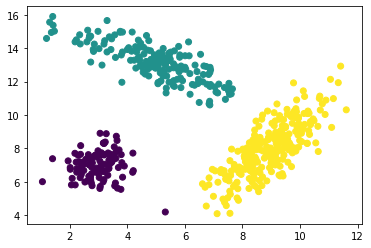

In [39]:
plt.scatter(X[:,0],X[:,1],c=cluster.labels_)


In [40]:
import cmath
z1 = complex(3,4)
z2 = complex(4,5)

In [41]:
for i in cluster.cluster_centers_:
    print(i)

[2.99222891 6.99109212]
[ 4.97692234 13.13438995]
[8.94993092 8.01953921]


### Loss function of the KMeans

In [52]:
def los_func(w):    
    cluster = KMeans(n_clusters=w,random_state=21)

    model = cluster.fit(X)
    lim = np.asarray([X[i,:] for i in range(X.shape[0]) if cluster.labels_[i]== 0])  
    sum1,sum2,sum3=[],[],[]
    
    for k in range(len(lim)):
        loss_func = np.dot(lim[k]-cluster.cluster_centers_[0],lim[k]-cluster.cluster_centers_[0]) 
        sum1.append(loss_func)
    a = sum(sum1)
    
    lim1 = np.asarray([X[i,:] for i in range(X.shape[0]) if cluster.labels_[i]== 1])  
    for k in range(len(lim1)):
        loss_func1 = np.dot(lim1[k]-cluster.cluster_centers_[1],lim1[k]-cluster.cluster_centers_[1]) 
        sum2.append(loss_func1)
    b=sum(sum2)
    
    lim2 = np.asarray([X[i,:] for i in range(X.shape[0]) if cluster.labels_[i]== 2])  
    for k in range(len(lim2)):
        loss_func2 = np.dot(lim2[k]-cluster.cluster_centers_[2],lim2[k]-cluster.cluster_centers_[2]) 
        sum3.append(loss_func2)
    c = sum(sum3)
    total = a+b+c
    return total

In [44]:
cluster.cluster_centers_[1]

array([ 4.97692234, 13.13438995])

In [46]:
X.shape[0]

530

## Loss_function V/S KMeans(No of clusters)

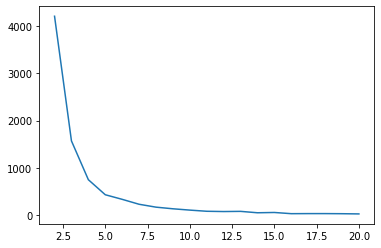

In [53]:
knee = np.arange(2,21)
sec =[los_func(w) for w in knee]
plt.plot(knee,sec)

In [54]:
sec

[4205.392176318896,
 1569.868921304173,
 749.5163239304707,
 431.78888636094166,
 334.66439195445406,
 230.39370215358383,
 169.3894383640135,
 134.8763885123453,
 106.96341653772613,
 82.37512575119233,
 76.64726746446094,
 80.4453422665807,
 50.715396774842624,
 56.851572531503855,
 31.48440257965885,
 33.06482960475462,
 33.06482960475462,
 30.846061236123642,
 26.435250738705903]